In [91]:
from qiskit import QuantumCircuit, Aer, execute, transpile, execute, IBMQ
from qiskit_aer import AerSimulator

from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import WeightedAdder

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister, Clbit, ClassicalRegister
from qiskit.circuit.library.standard_gates import IGate, XGate, CXGate, CCXGate, C3XGate, C4XGate, MCXGate, \
                                                  RXGate, RYGate, RZGate, HGate
from qiskit.exceptions import QiskitError

import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from _functools import *
from traceback import format_exc

from qmul import setInputs, initGates

In [92]:
backend = AerSimulator(method='matrix_product_state')

In [93]:
nInputs = 2
nOutputs = 2

nQubits = nInputs+nOutputs

q = QuantumRegister(nQubits, 'q')
c = ClassicalRegister(nOutputs, 'c')

sCirc = QuantumCircuit(q, c)

In [94]:
initGates(sCirc, qreq=q, nInputs=nInputs)
nums = [1, 0] #[X, Y]

for i in range(2):
    if nums[i] == 1: gateName = 'x'
    else: gateName = 'id'

    sCirc.data[i].operation.name = gateName

q0: X

q1: Y

q2: D = X XOR Y = X ⊕ Y

q3: B = not-X AND Y = X' & Y = ~X ^ Y

# D Part

D = X XOR Y = X ⊕ Y

In [95]:
sCirc.cx(q[0], q[1])
sCirc.cx(q[1], q[2])

# B Part

B = not-X AND Y = X' & Y = ~X ^ Y

In [96]:
sCirc.x(q[0])
sCirc.ccx(q[0], q[1], q[3])

In [97]:
sCirc.measure(2, 0)
sCirc.measure(3, 1)

In [98]:
job = execute(sCirc, backend, shots=2000)
result = job.result()
counts = result.get_counts()

print(counts)

for count in list(counts):
    print(int(count, 2))

{'01': 2000}
1


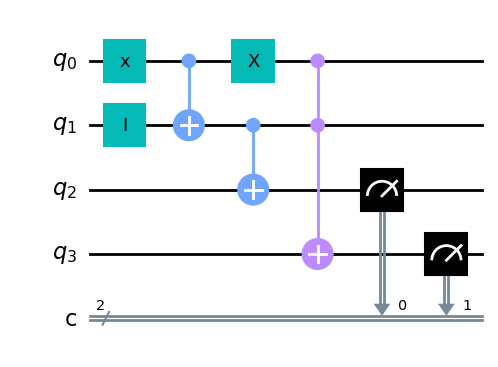

In [99]:
sCirc.draw(output='mpl')

In [100]:
list(sCirc.data)

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1)), clbits=()),
 CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2)), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(Quantu